In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Regression

/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Regression


In [3]:
df=pd.read_csv('meandepth-inbreeding.csv')
df=df[["Unnamed: 0","meandepth","KB","F"]]
df.set_index("Unnamed: 0", inplace=True)
df.index.name=None
df.sort_values(by="meandepth",inplace=True)
df

,meandepth,KB,F
87,0.088328,2131910.0,0.3897
29,0.092072,1725630.0,0.3810
67,0.095135,2143780.0,0.4756
41,0.105250,2101440.0,0.2982
65,0.107047,2150360.0,0.5562
...,...,...,...
61,0.389640,516081.0,-0.7292
14,0.391232,737722.0,-0.6023
89,0.402968,770376.0,-0.6316
30,0.521386,544340.0,-0.8786


In [4]:
rohreturnvalue=sm.nonparametric.lowess(df["KB"],df["meandepth"],frac=0.7,it=1,return_sorted=False)

In [5]:
freturnvalue=sm.nonparametric.lowess(df["F"],df["meandepth"],frac=0.6,it=8,return_sorted=False)

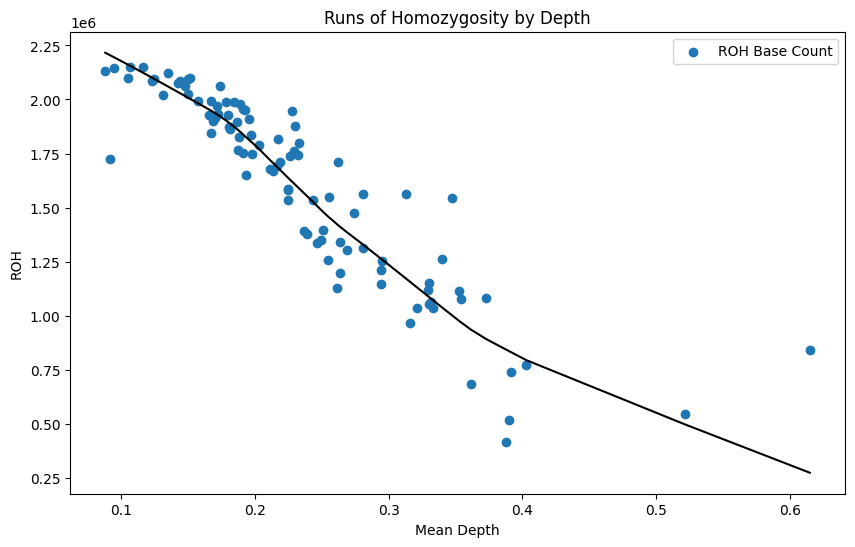

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df["meandepth"], df["KB"], label='ROH Base Count')
plt.plot(df["meandepth"], rohreturnvalue,  color = 'black')
plt.xlabel('Mean Depth')
plt.ylabel('ROH')
plt.title('Runs of Homozygosity by Depth')
plt.legend()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/1. ROH Loess Regression.png')
plt.show()

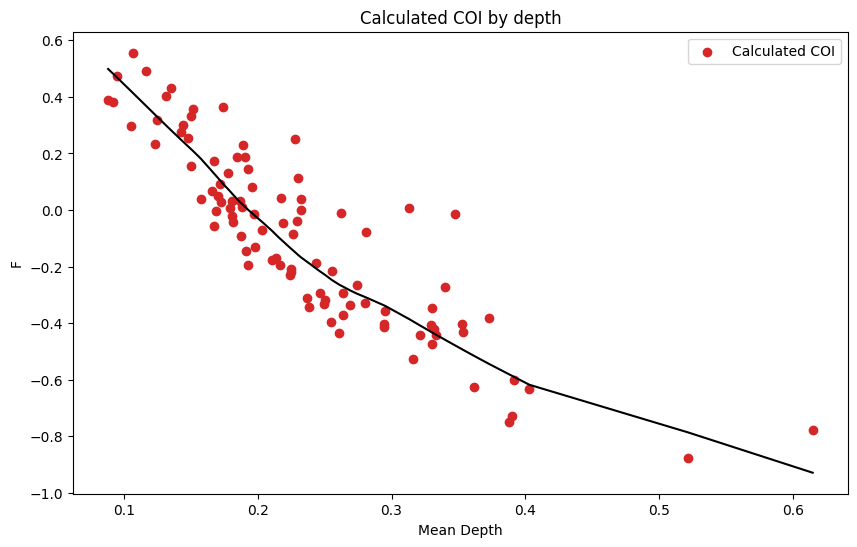

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df["meandepth"], df["F"], color='#d62728', label='Calculated COI')
plt.plot(df["meandepth"], freturnvalue, color='black')
plt.xlabel('Mean Depth')
plt.ylabel('F')
plt.title('Calculated COI by depth')
plt.legend()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/1. Inbreeding Coefficient Loess Regression.png')
plt.show()

In [15]:
df['ROH residuals']=df['KB']-rohreturnvalue
df['Inbreeding residuals']=df['F']-freturnvalue

In [16]:
rohresidualreturnvalue=sm.nonparametric.lowess(df["ROH residuals"],df["meandepth"],frac=0.9,it=4)

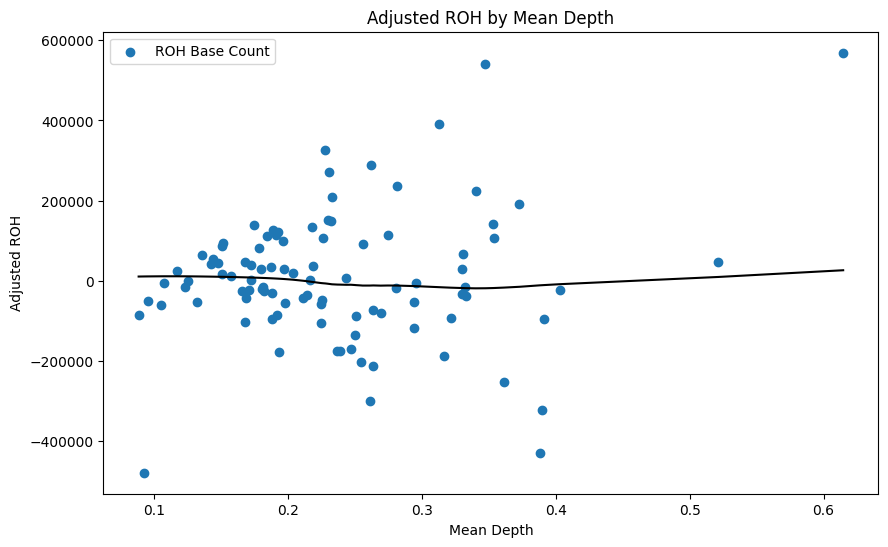

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df["meandepth"], df["ROH residuals"], label='ROH Base Count')
plt.plot(rohresidualreturnvalue[0:,0], rohresidualreturnvalue[0:,1], color='black')
plt.xlabel('Mean Depth')
plt.ylabel('Adjusted ROH')
plt.title('Adjusted ROH by Mean Depth')
plt.legend()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/1. Runs of Homozigosity residuals.png')
plt.show()

In [21]:
fresidualreturnvalue=sm.nonparametric.lowess(df["Inbreeding residuals"],df["meandepth"],frac=0.97,it=4)

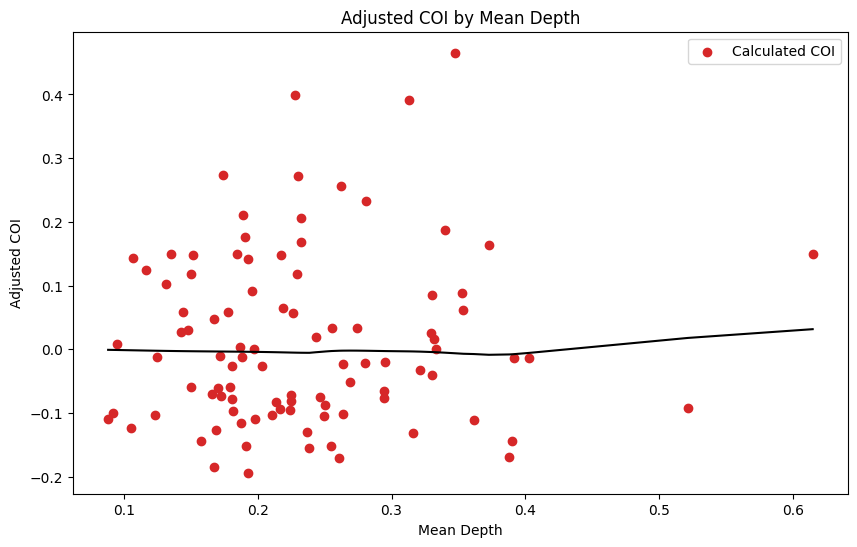

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df["meandepth"], df["Inbreeding residuals"], color='#d62728', label='Calculated COI')
plt.plot(fresidualreturnvalue[0:,0], fresidualreturnvalue[0:,1], color='black')
plt.xlabel('Mean Depth')
plt.ylabel('Adjusted COI')
plt.title('Adjusted COI by Mean Depth')
plt.legend()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/1. Inbreeding coefficient.png')
plt.show()

In [26]:
ROHInbreedingcorrelation=sm.nonparametric.lowess(df["ROH residuals"],df["Inbreeding residuals"],frac=0.5,it=4)

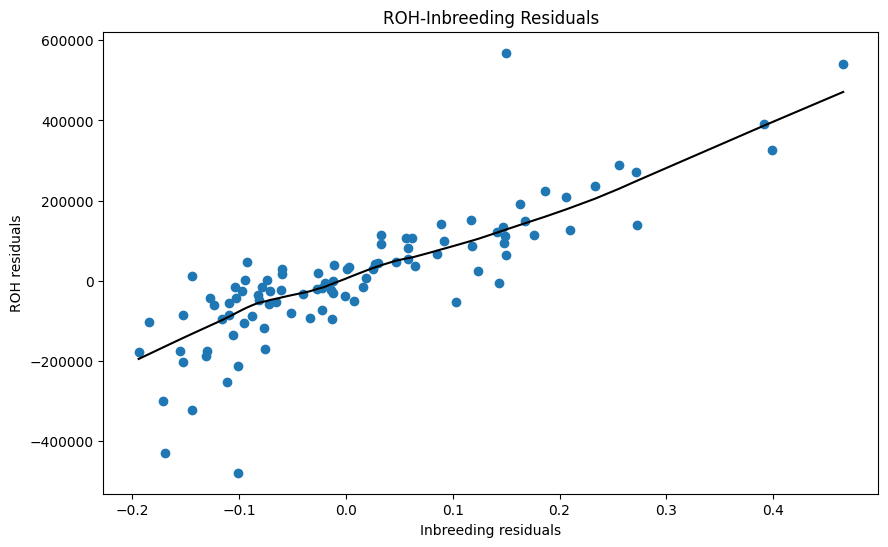

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Inbreeding residuals"], df["ROH residuals"])
plt.plot(ROHInbreedingcorrelation[0:,0], ROHInbreedingcorrelation[0:,1],color='black')
plt.xlabel('Inbreeding residuals')
plt.ylabel('ROH residuals')
plt.title('ROH-Inbreeding Residuals')
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/2. ROH-Inbreeding Residuals comparison.png')
plt.show()

In [28]:
dogdf=pd.read_excel('dog_details.xlsx')
dogdf.dropna(subset=['kraken'],inplace=True)
dogdf.set_index('SAMPLE NO.',inplace=True)
dogdf.index.name=None
dogdf=dogdf['BREED']

In [29]:
df['breed']=dogdf
df.sort_values(by='Inbreeding residuals')

,meandepth,KB,F,ROH residuals,Inbreeding residuals,breed
44,0.193176,1648490.0,-0.194400,-178506.166877,-0.193993,FRENCH BULLDOG
99,0.167433,1844140.0,-0.055720,-103659.358867,-0.184713,Shiba Inu+Bichon Frise Mix
6,0.261109,1126740.0,-0.435200,-298498.163050,-0.170834,GERMAN SHEPHERD & HUSKY MIX
115,0.387909,414341.0,-0.750100,-428407.199891,-0.169021,Saluki+Alaskan sled dog (50/50)
42,0.238704,1379630.0,-0.344100,-175662.229486,-0.154897,CAUCASIAN SHEPHERD
...,...,...,...,...,...,...
96,0.230171,1878060.0,0.113300,271945.193687,0.271857,Irish Wolfhound
95,0.174155,2061910.0,0.365500,140027.252968,0.273003,Irish Wolfhound
92,0.313049,1563160.0,0.006494,391736.714389,0.391796,golden retriever/chesapeake bay retriver
17,0.227788,1947790.0,0.250600,327407.329252,0.398992,WEST HIGHLAND WHITE TERRIER


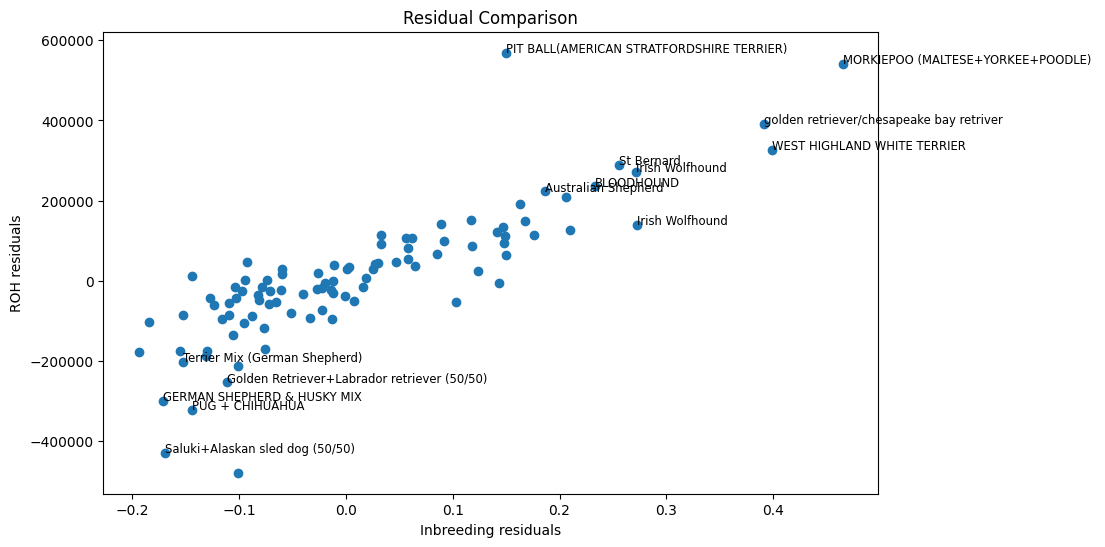

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Inbreeding residuals"], df["ROH residuals"])
plt.xlabel("Inbreeding residuals")
plt.ylabel('ROH residuals')
plt.title('Residual Comparison')
for k,v in df.iterrows():
  if (v['ROH residuals']<-200000 and v['Inbreeding residuals']<-0.11)or(v['ROH residuals']>210000 or v['Inbreeding residuals']>0.25):
    plt.annotate(v["breed"], (v["Inbreeding residuals"], v["ROH residuals"]),fontsize='small')
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/3. Residual Comparison labeled.png')
plt.show()

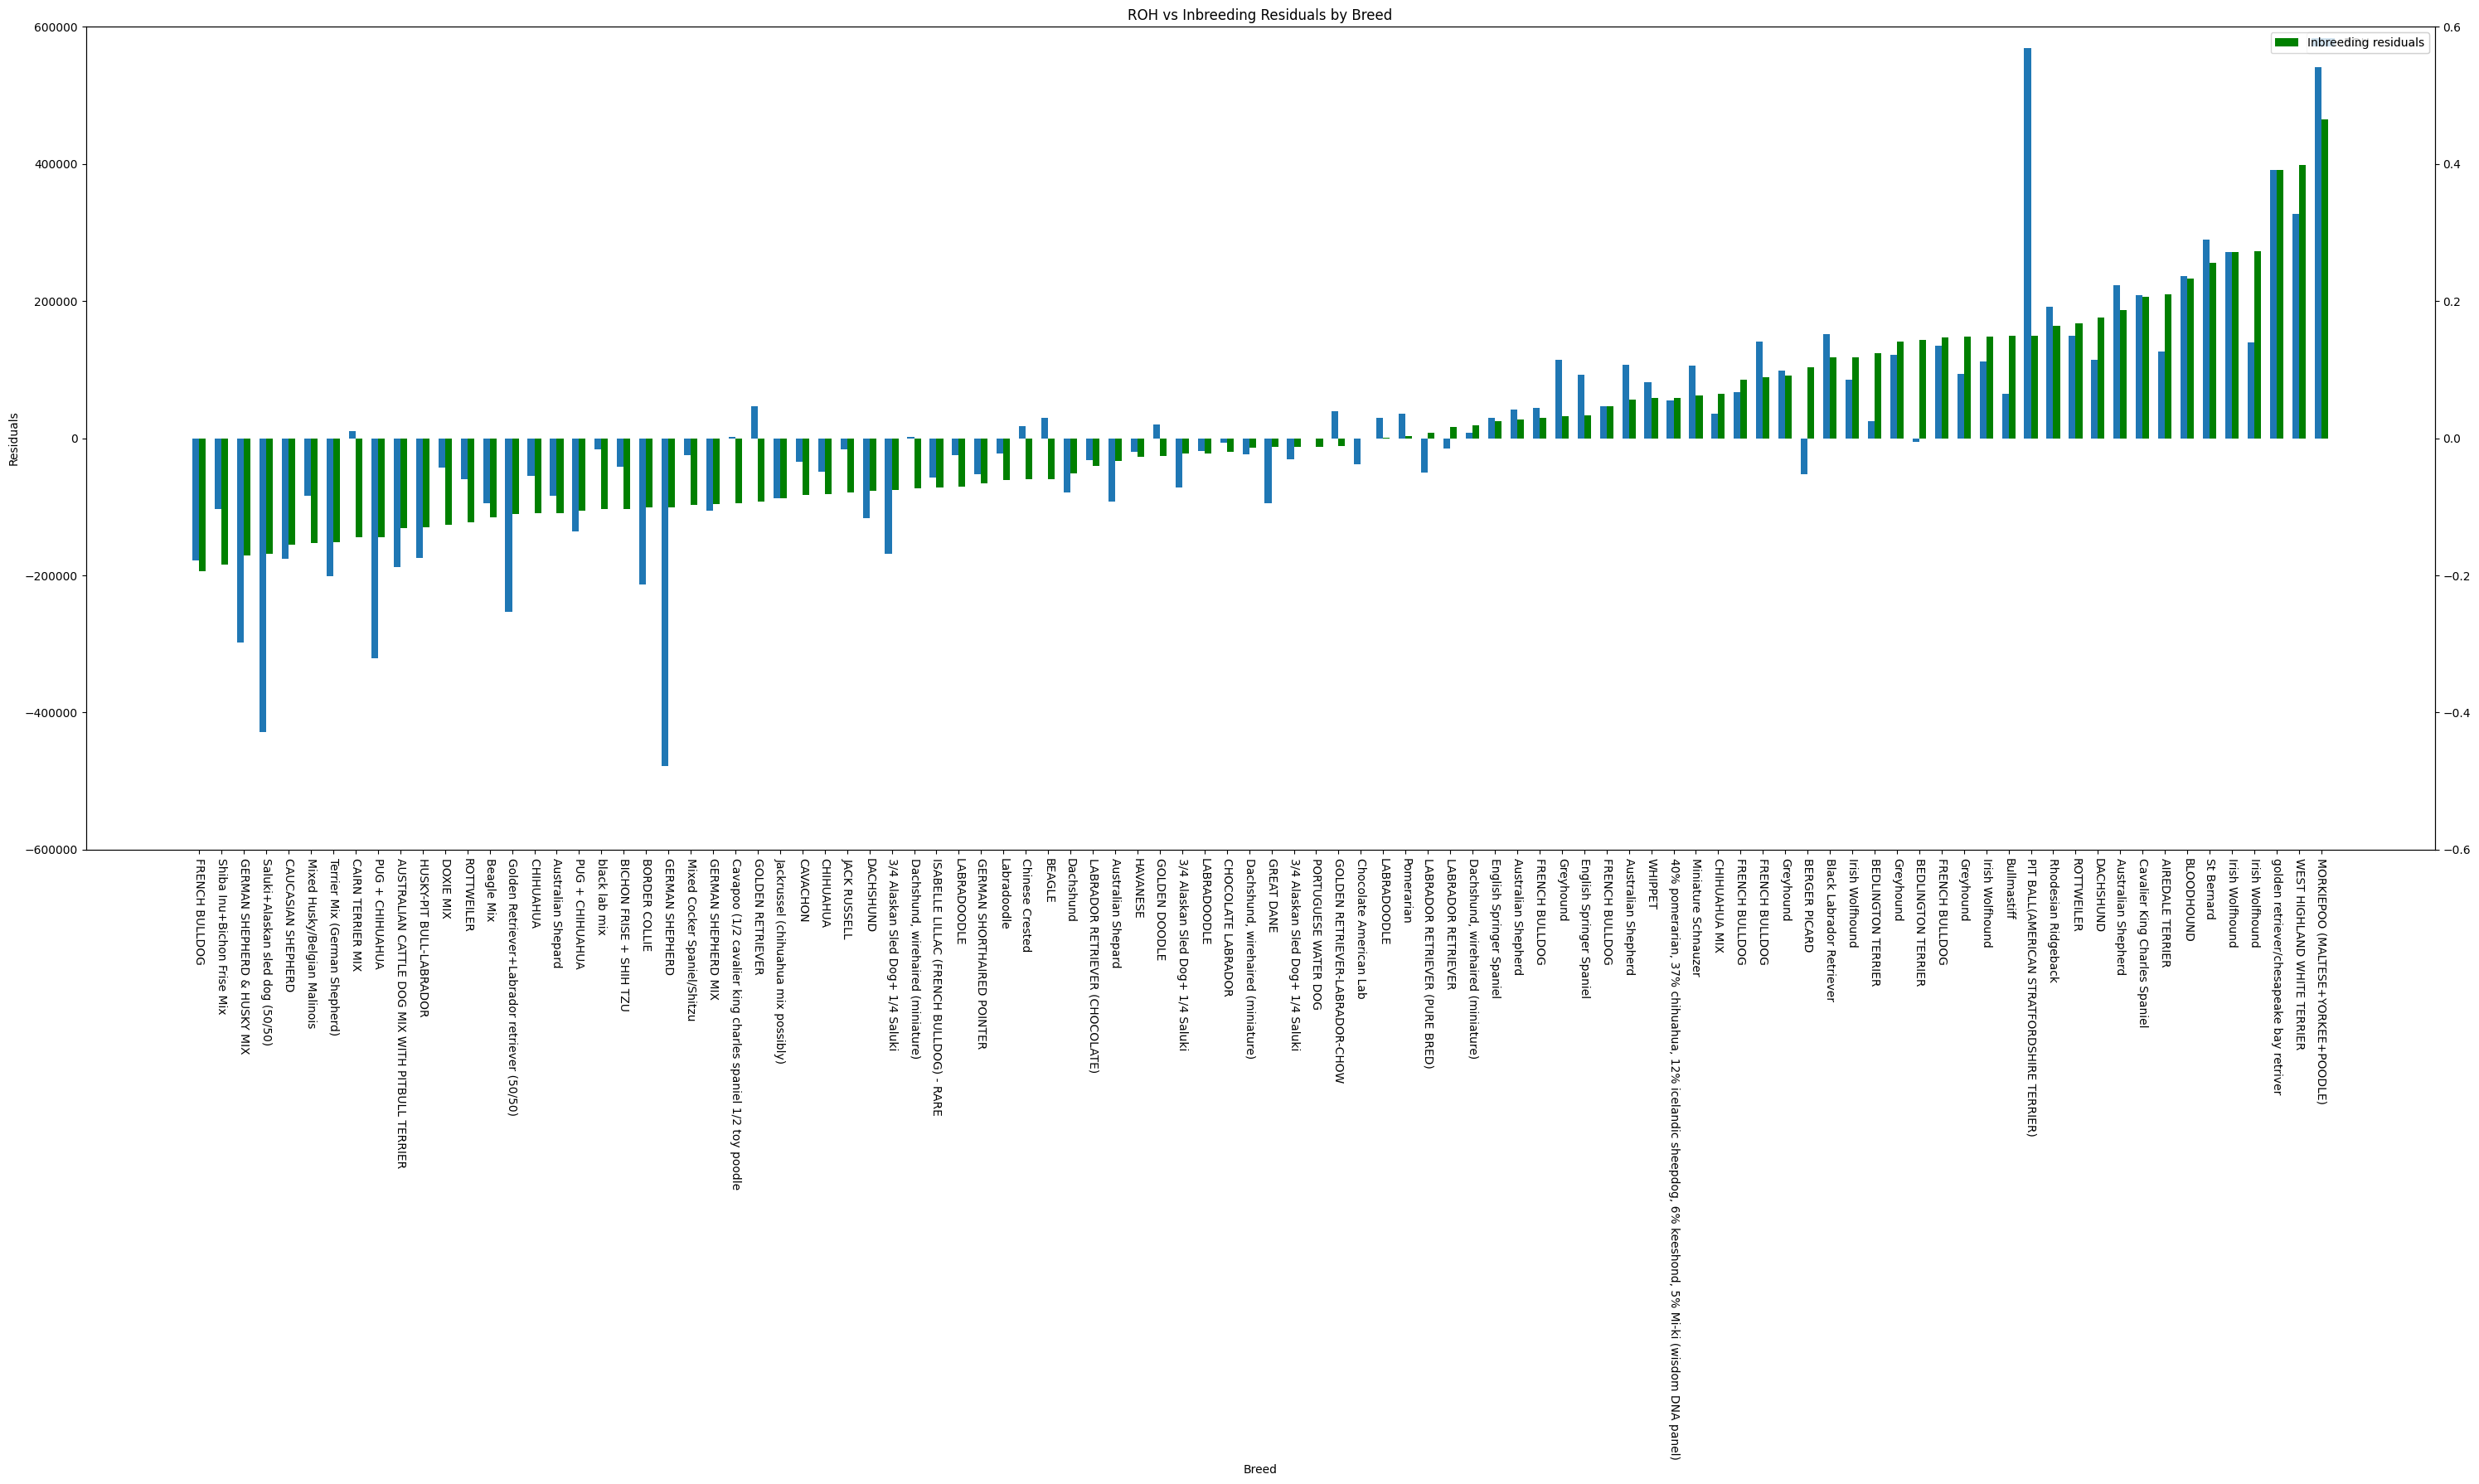

In [31]:
df.sort_values(by='Inbreeding residuals', inplace=True)
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(df['breed']))

roh_bars = ax.bar(index, df['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], df['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/3. ROH v Inbreeding Residuals by inbreeding.png')
plt.show()

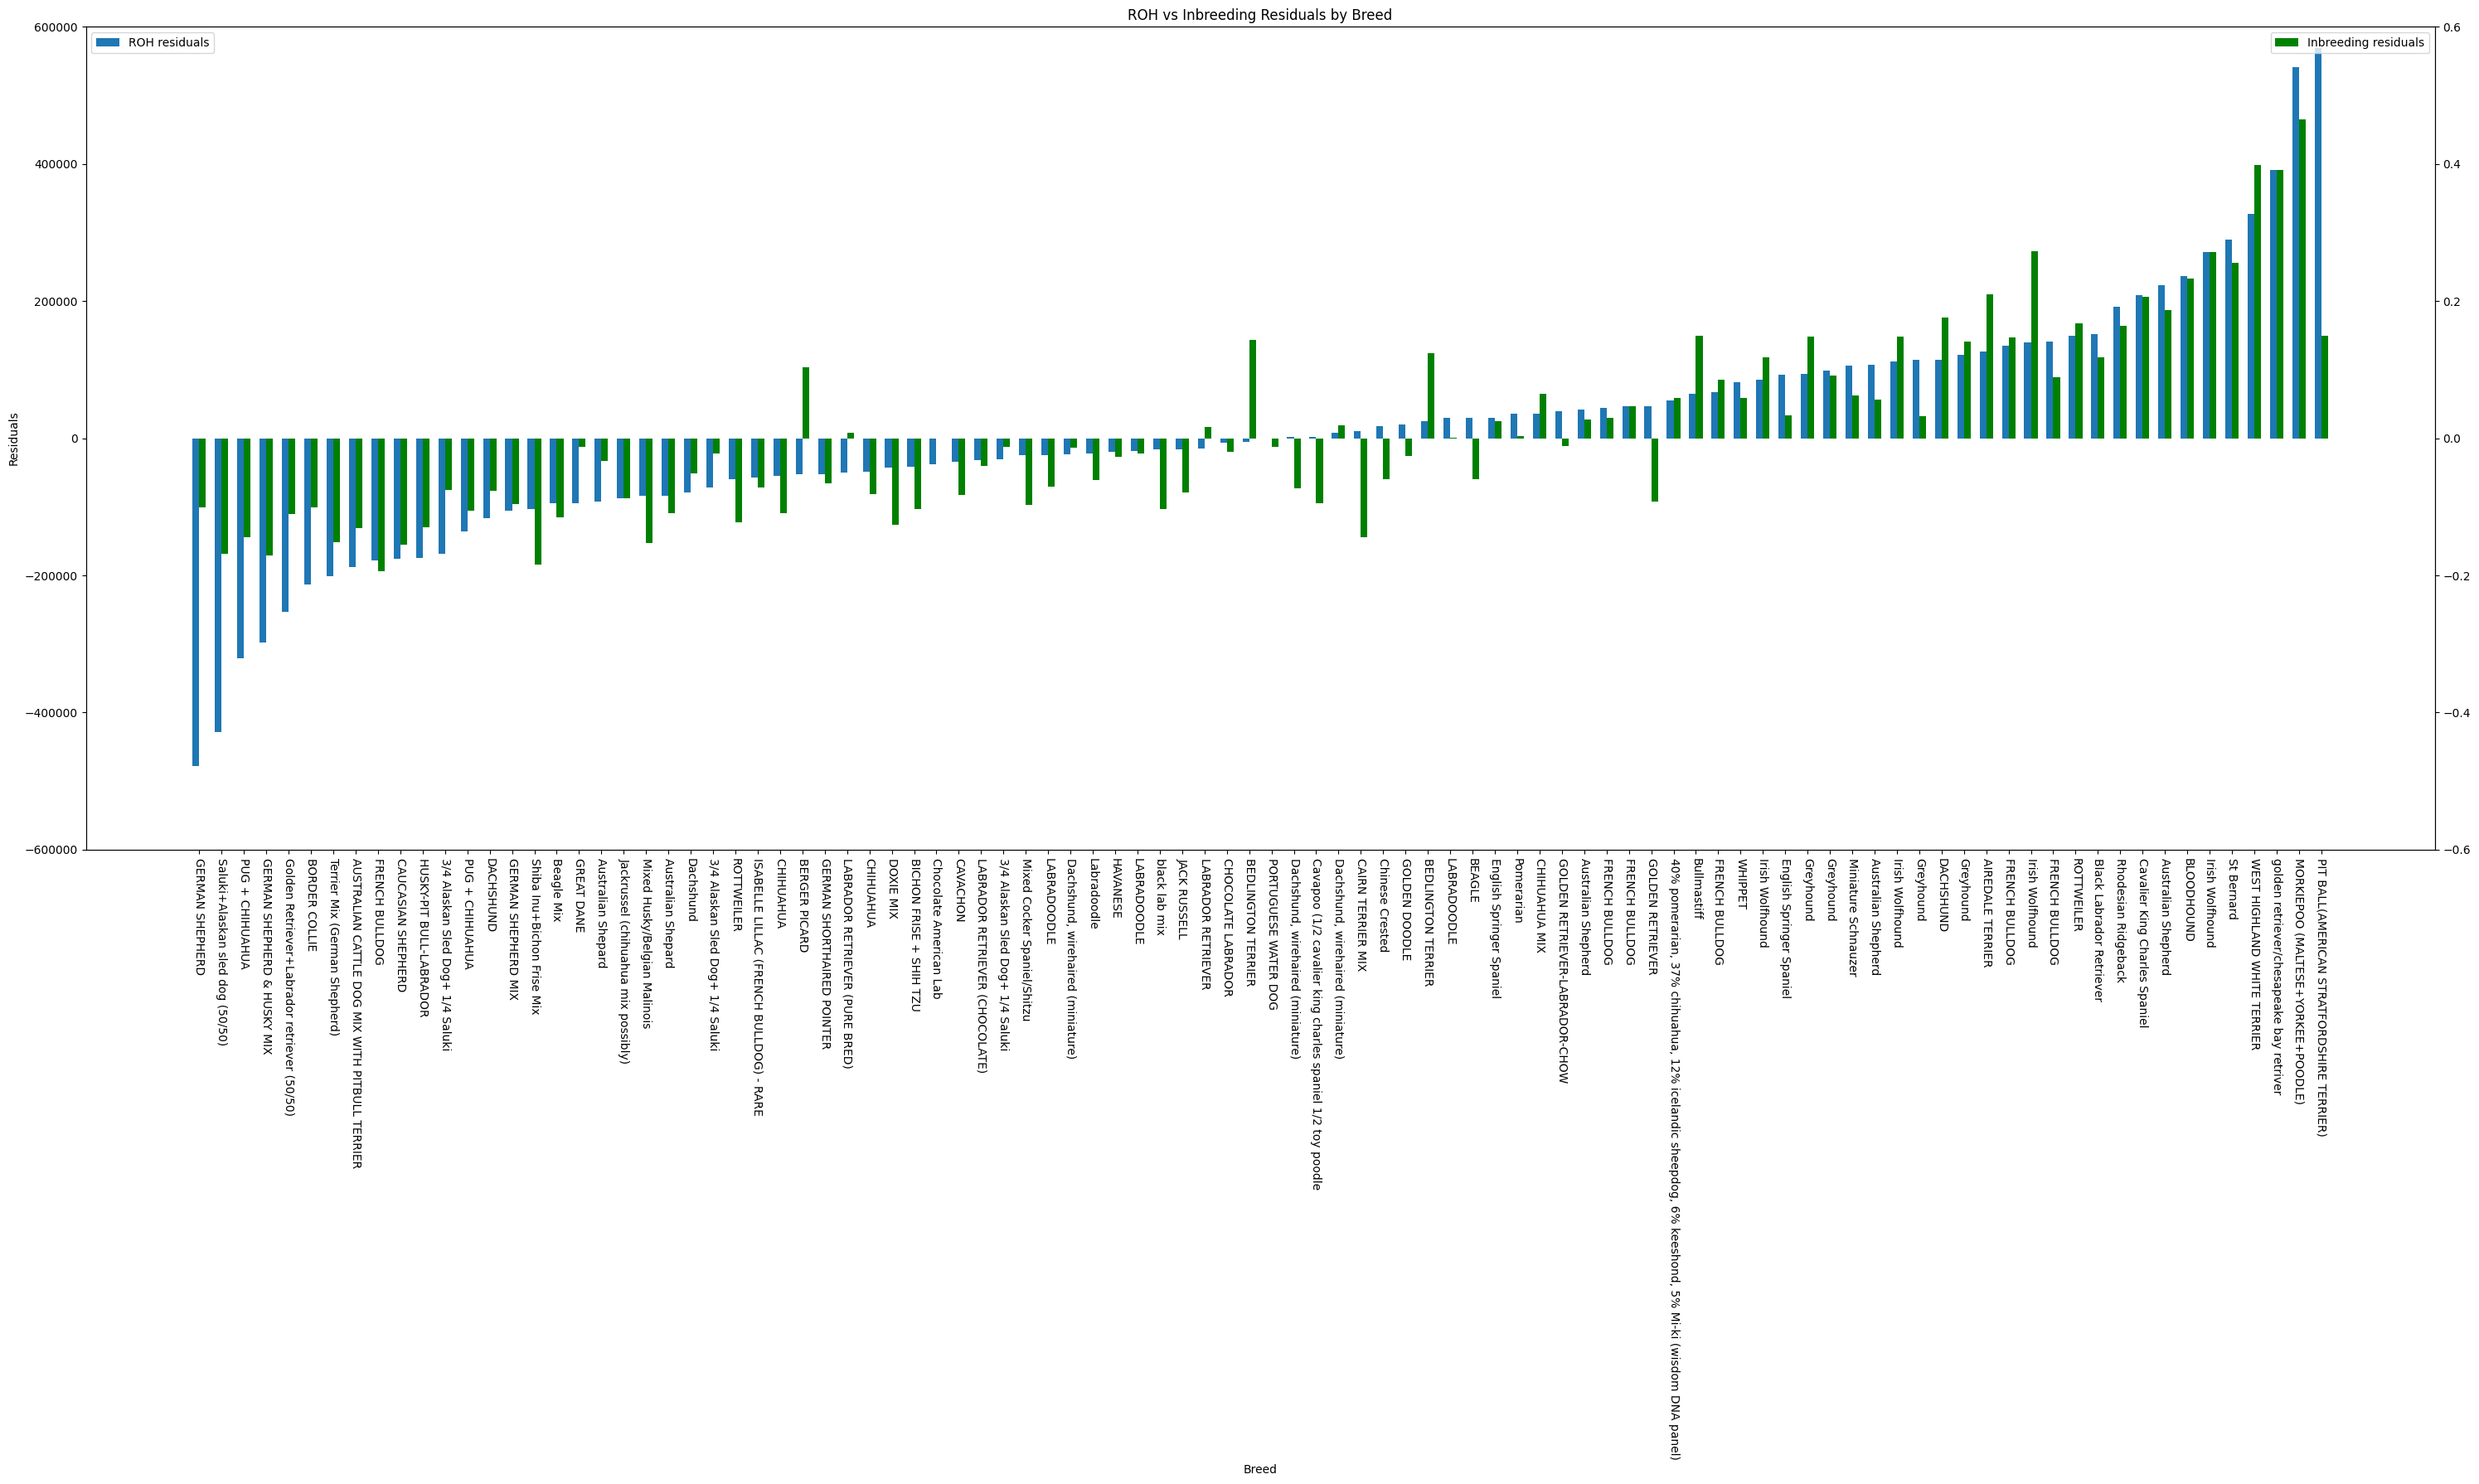

In [32]:
df.sort_values(by='ROH residuals', inplace=True)
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(df['breed']))

roh_bars = ax.bar(index, df['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], df['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/3. ROH v Inbreeding residuals ordered by ROH.png')
plt.show()

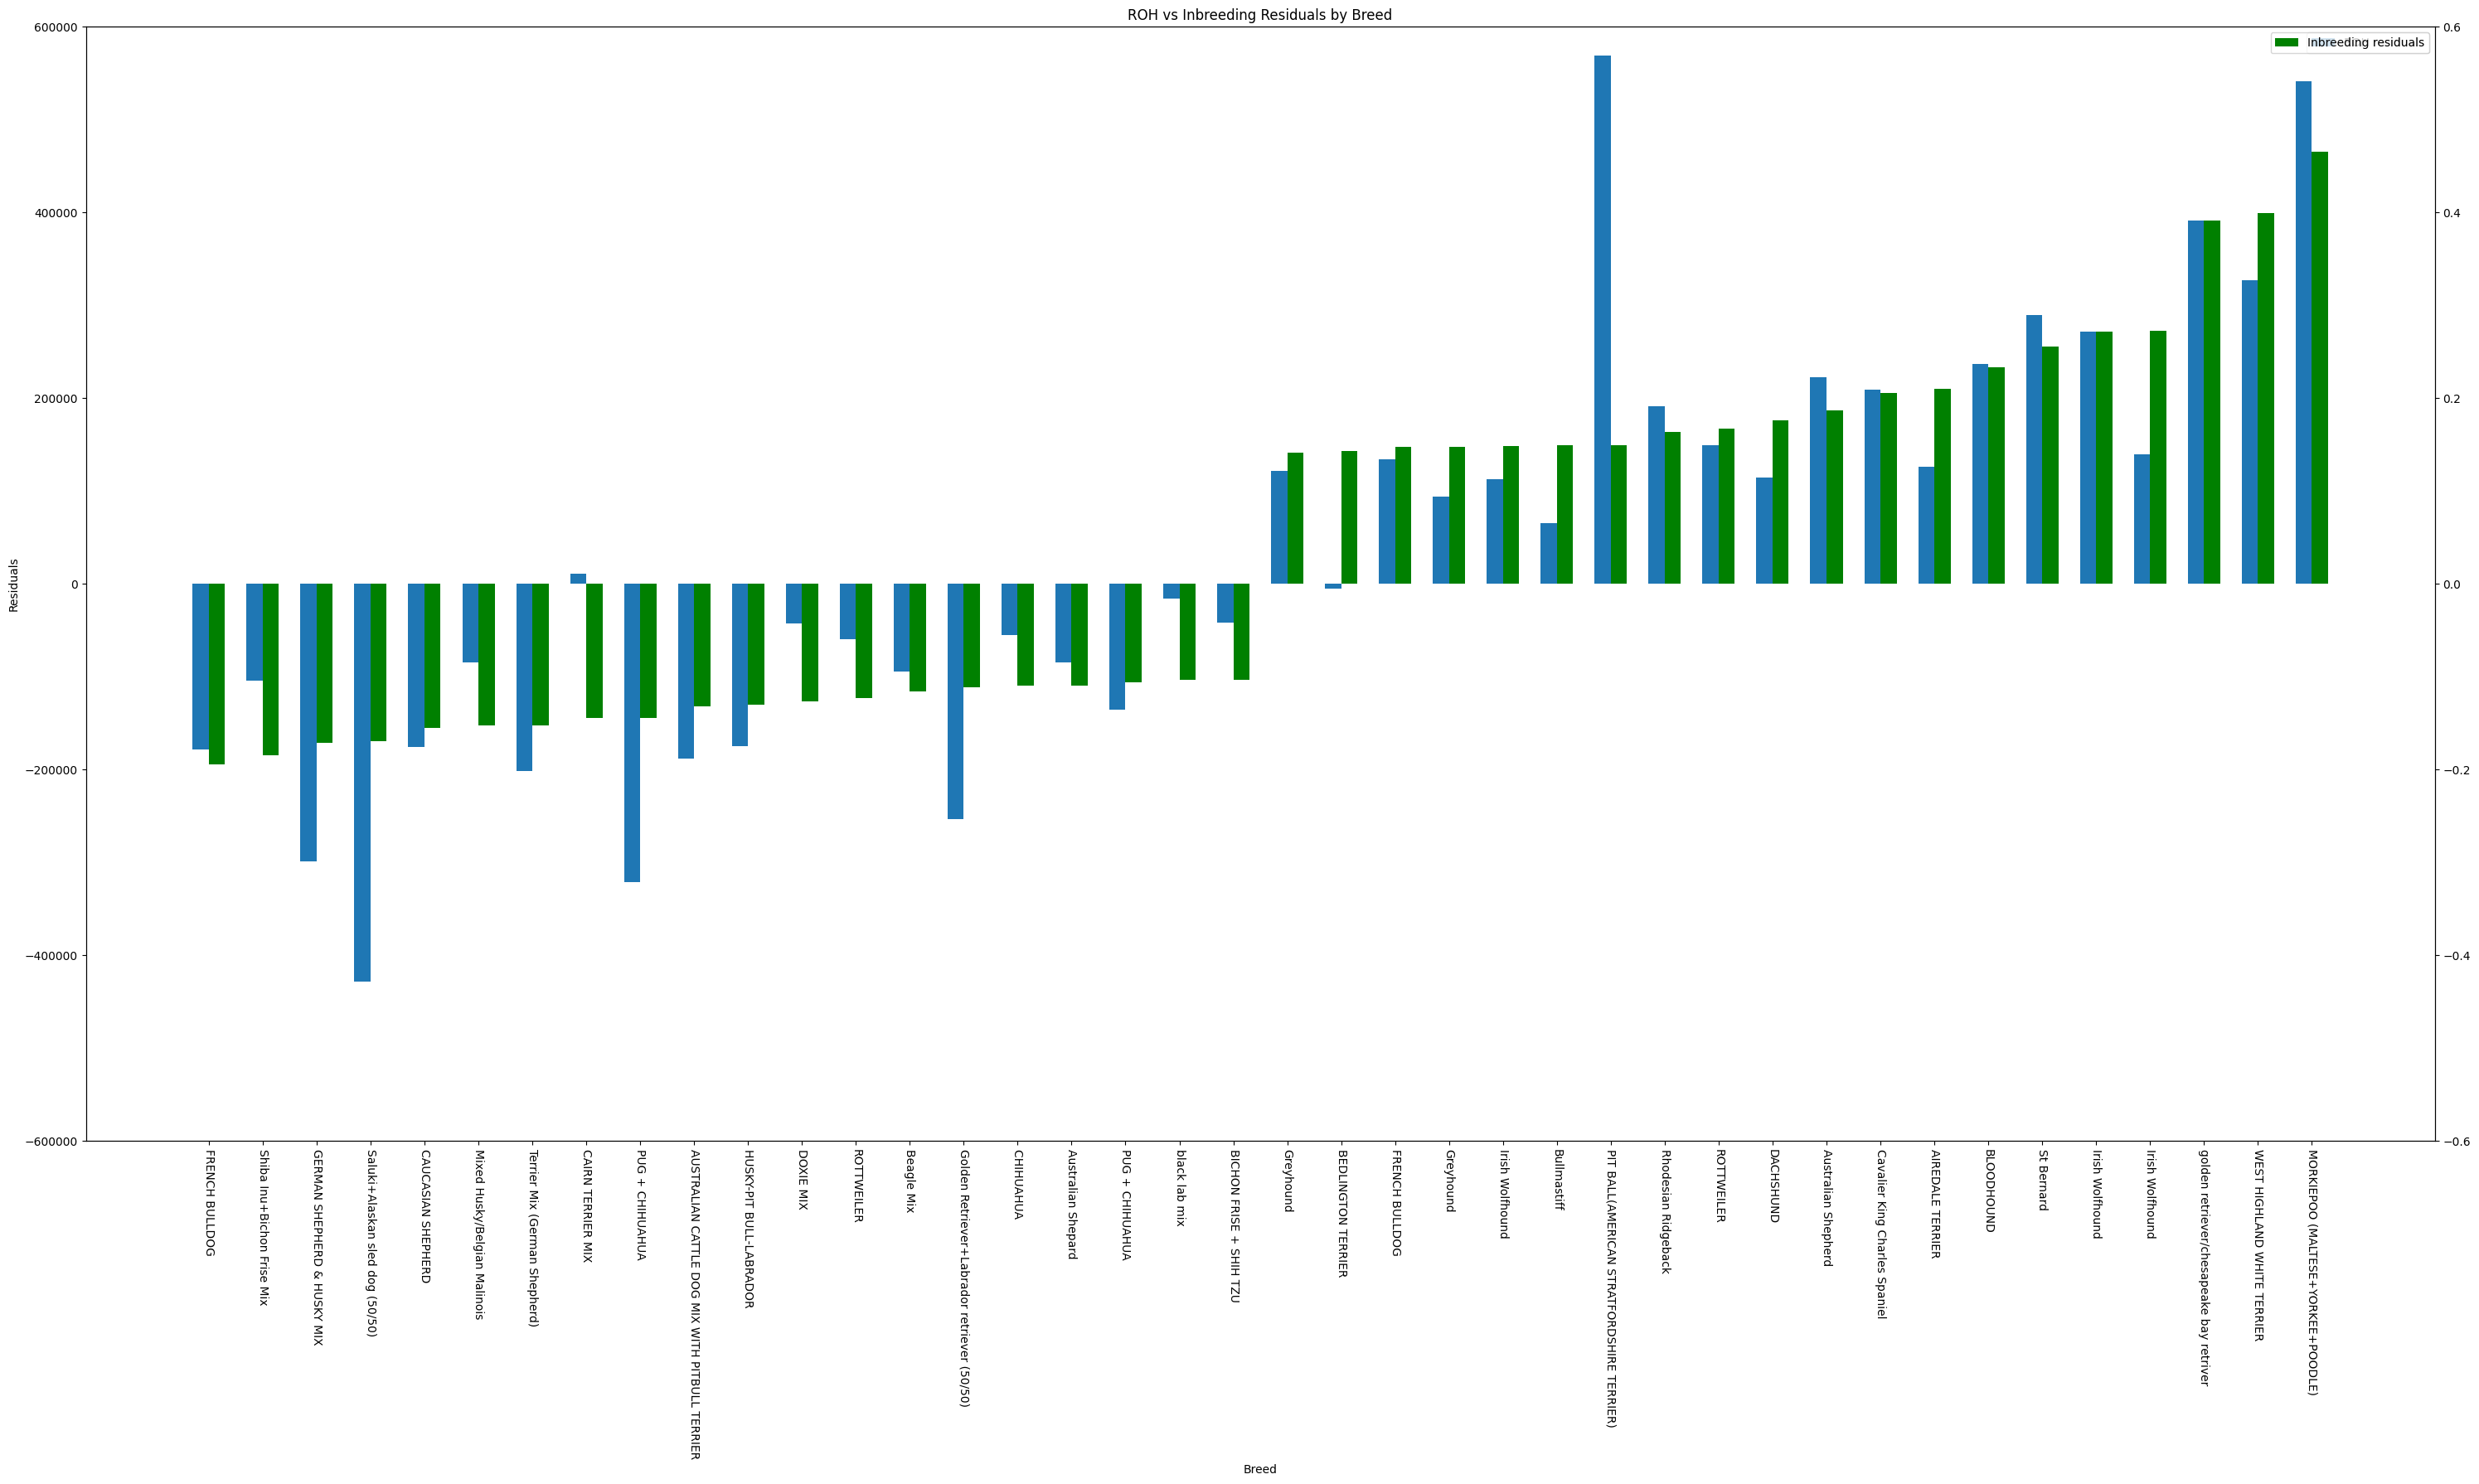

In [33]:
df.sort_values(by='Inbreeding residuals', inplace=True)
concatdf=pd.concat([df.head(20),df.tail(20)])
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(concatdf['breed']))

roh_bars = ax.bar(index, concatdf['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], concatdf['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(concatdf['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/3. Short ROH v Inbreeding residuals.png')
plt.show()

In [34]:
df['Inbreeding ranking']=df['Inbreeding residuals'].rank(method='average')
df['ROH ranking']=df['ROH residuals'].rank(method='average')
df['average ranking']=(df['Inbreeding ranking']+df['ROH ranking'])/2

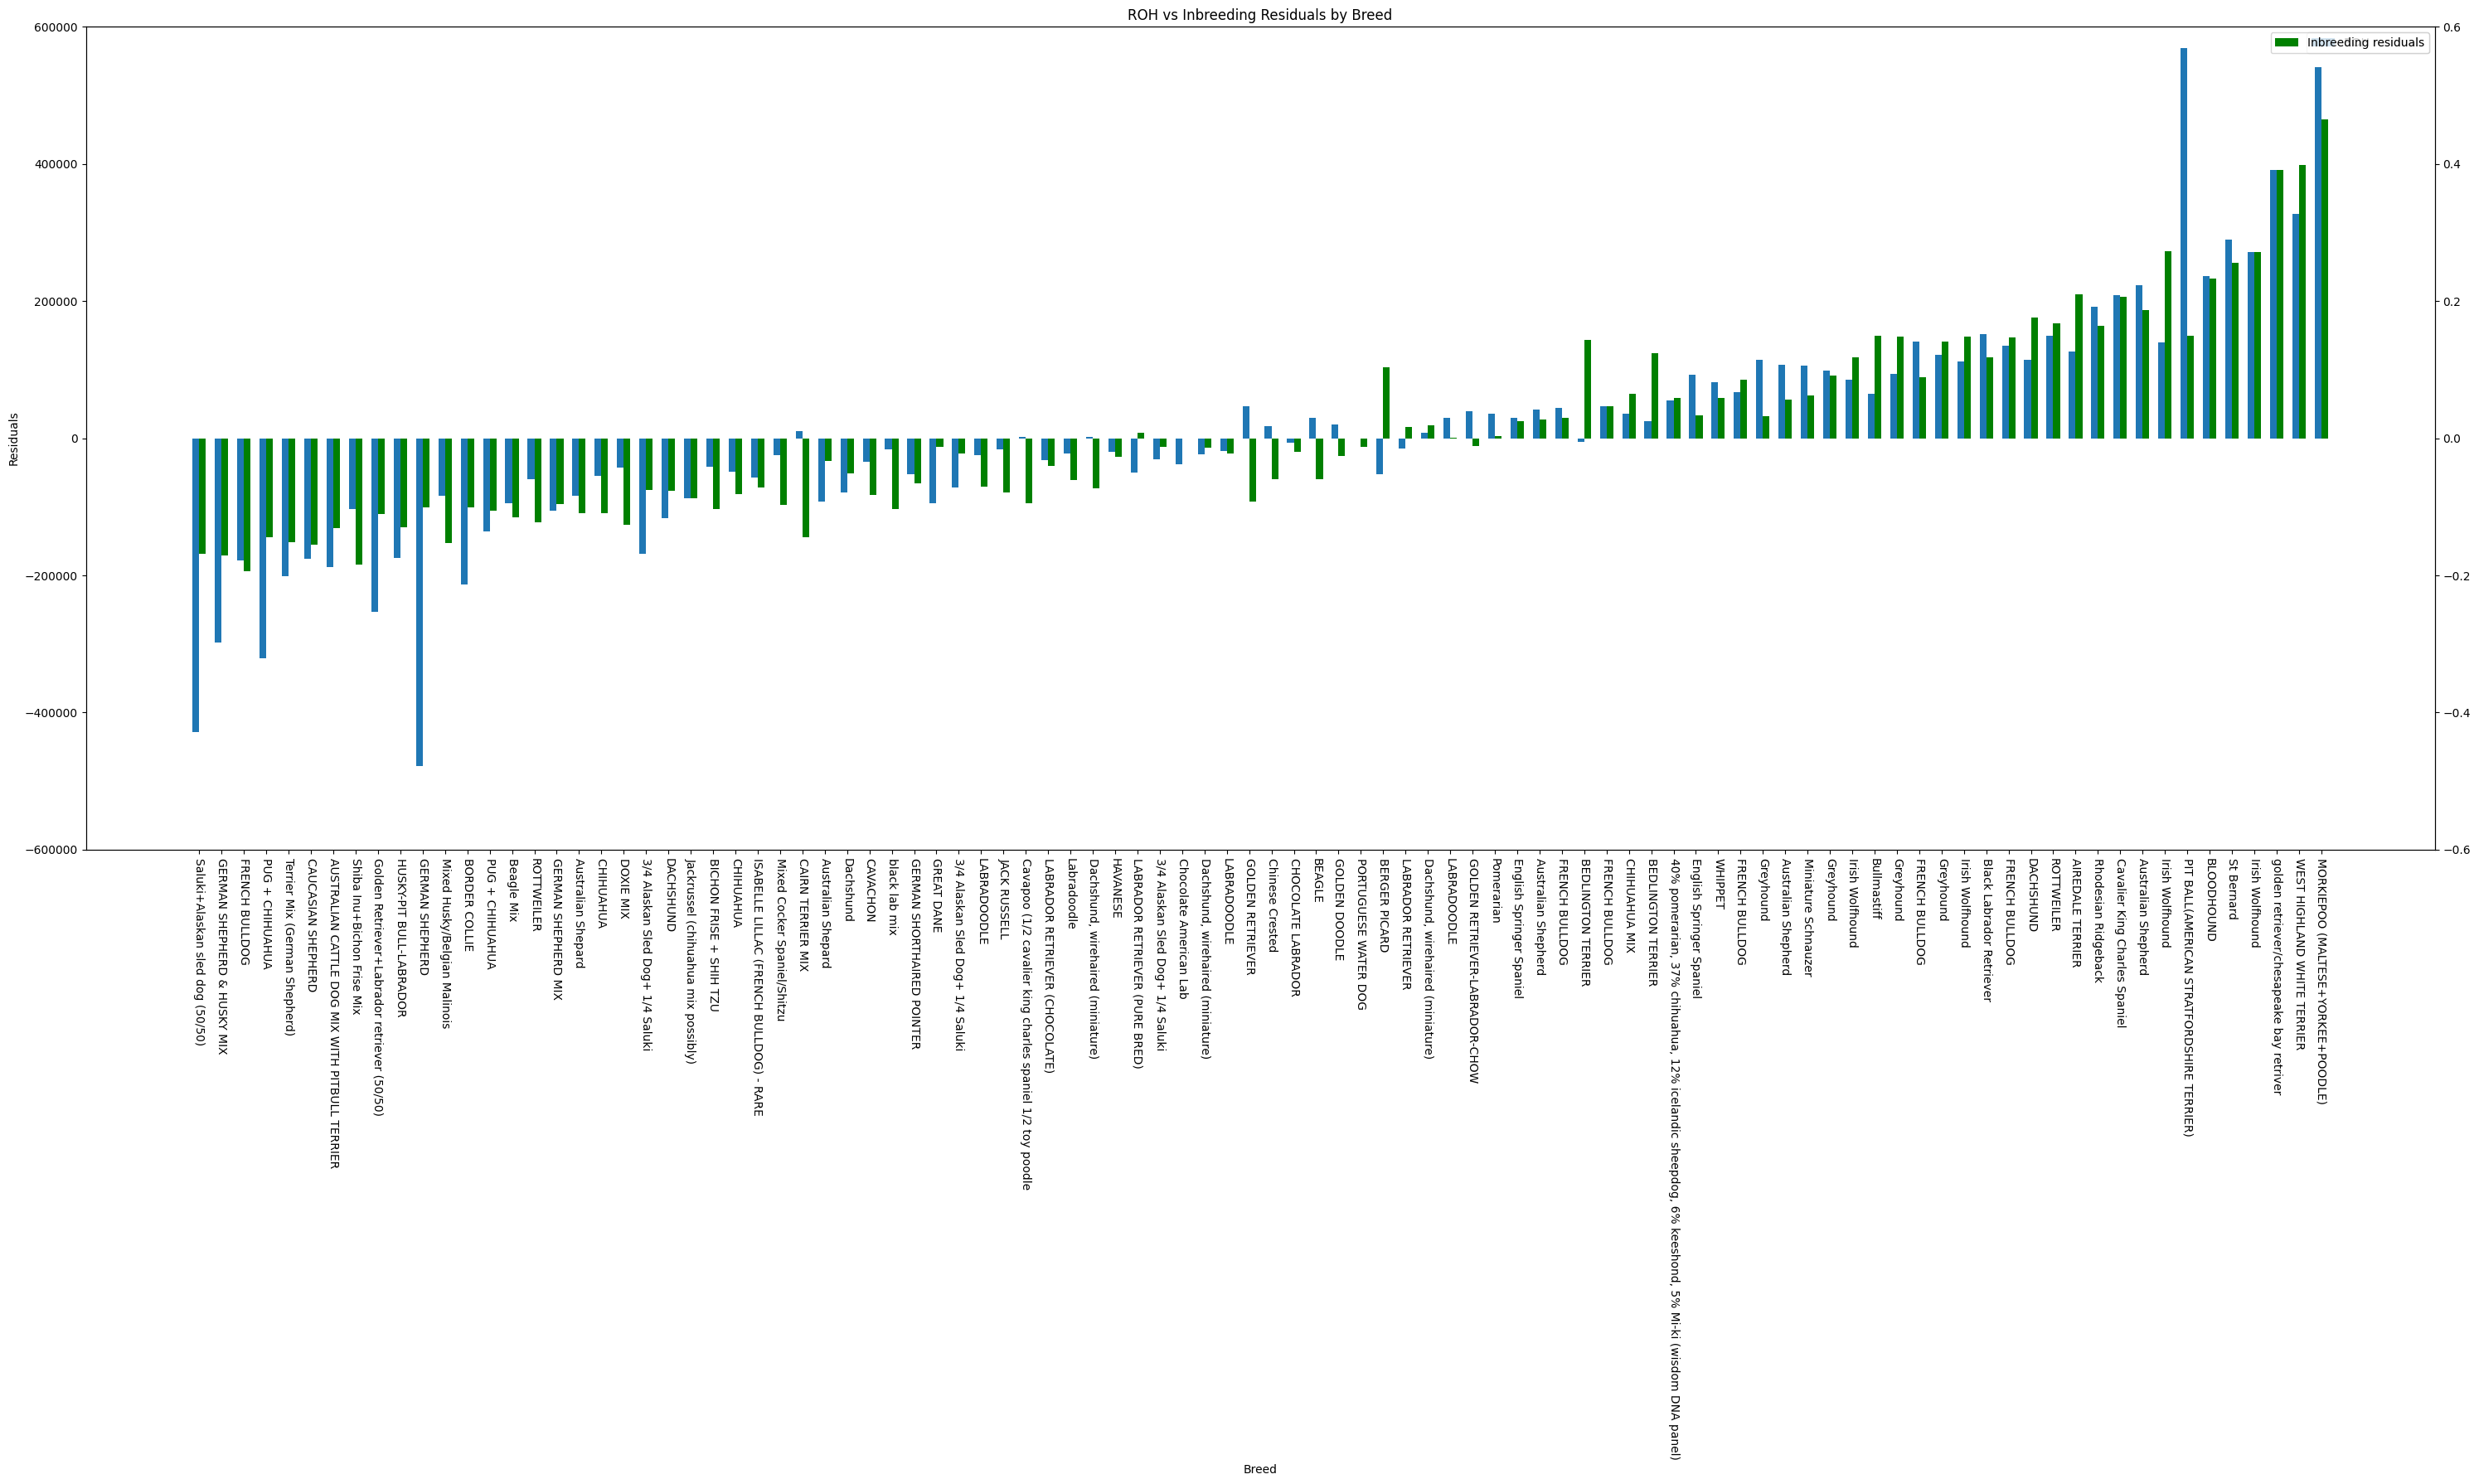

In [35]:
df.sort_values(by='average ranking', inplace=True)
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(df['breed']))

roh_bars = ax.bar(index, df['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], df['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/3. ROH v Inbreeding residuals by average ranking.png')
plt.show()

In [68]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Regression/breed-inbreeding.csv')

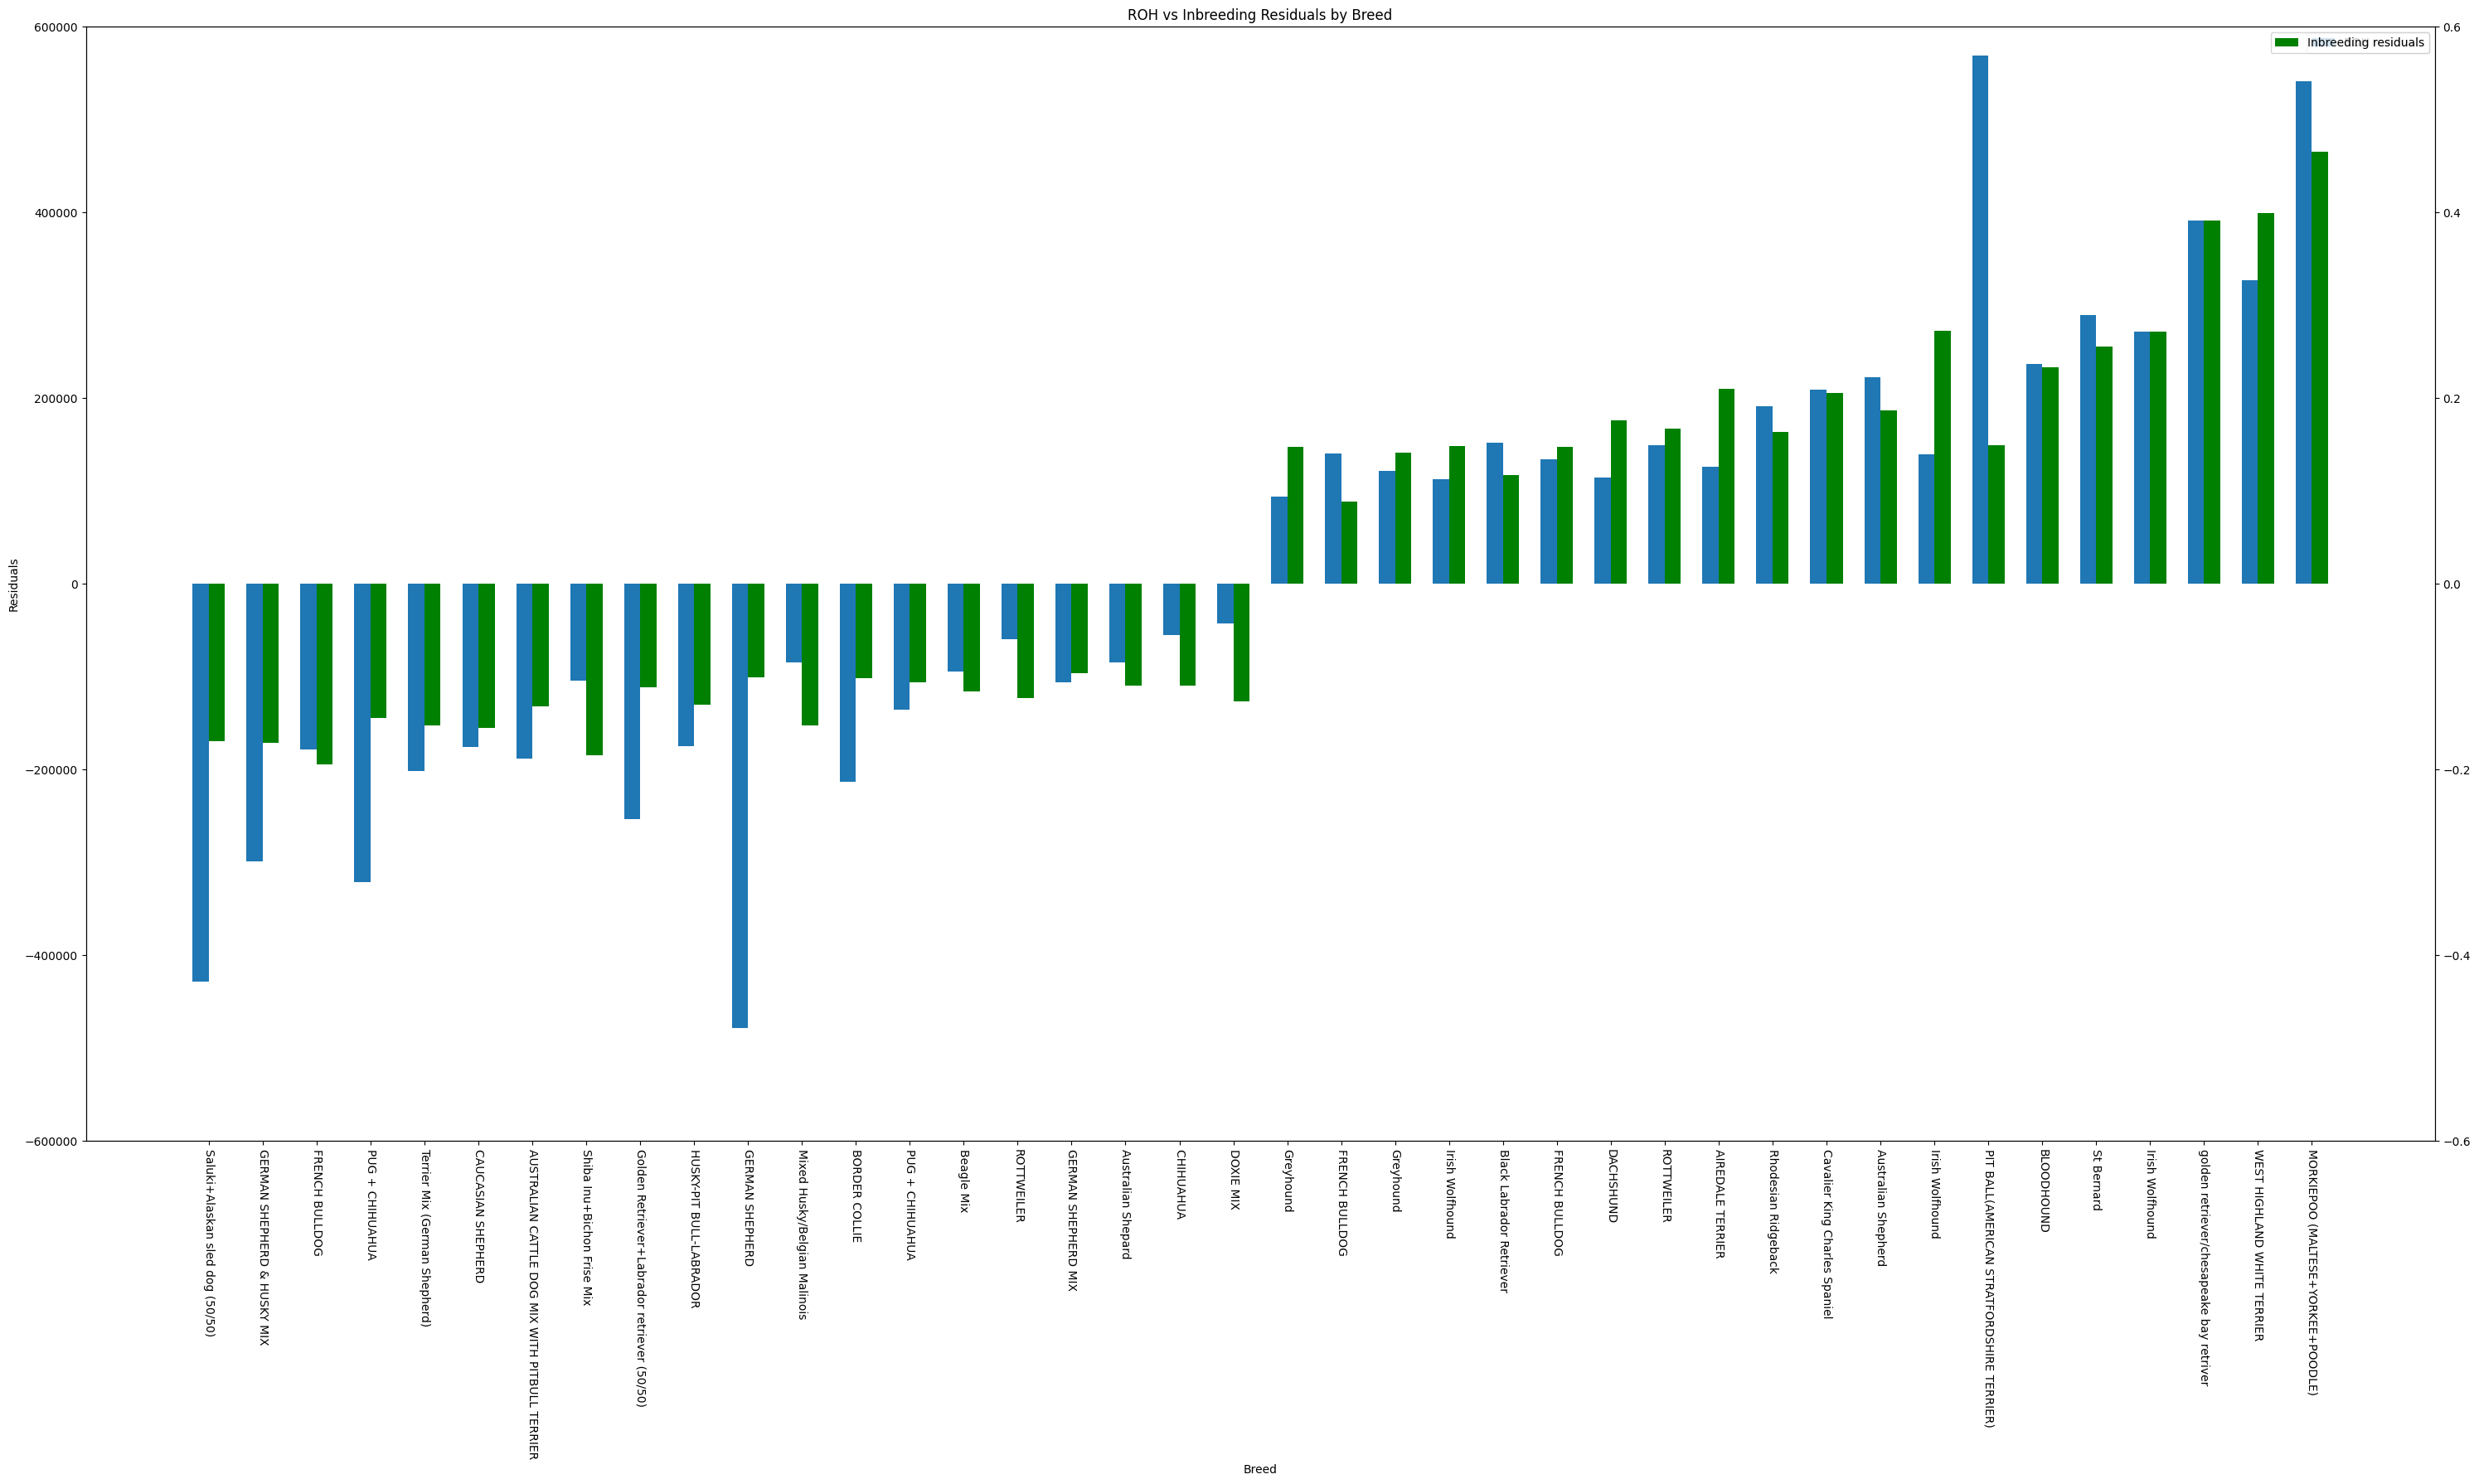

In [36]:
df.sort_values(by='average ranking', inplace=True)
concatdf=pd.concat([df.head(20),df.tail(20)])
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(concatdf['breed']))

roh_bars = ax.bar(index, concatdf['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], concatdf['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(concatdf['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/3. Short ROH v Inbreeding residuals by average ranking.png')
plt.show()

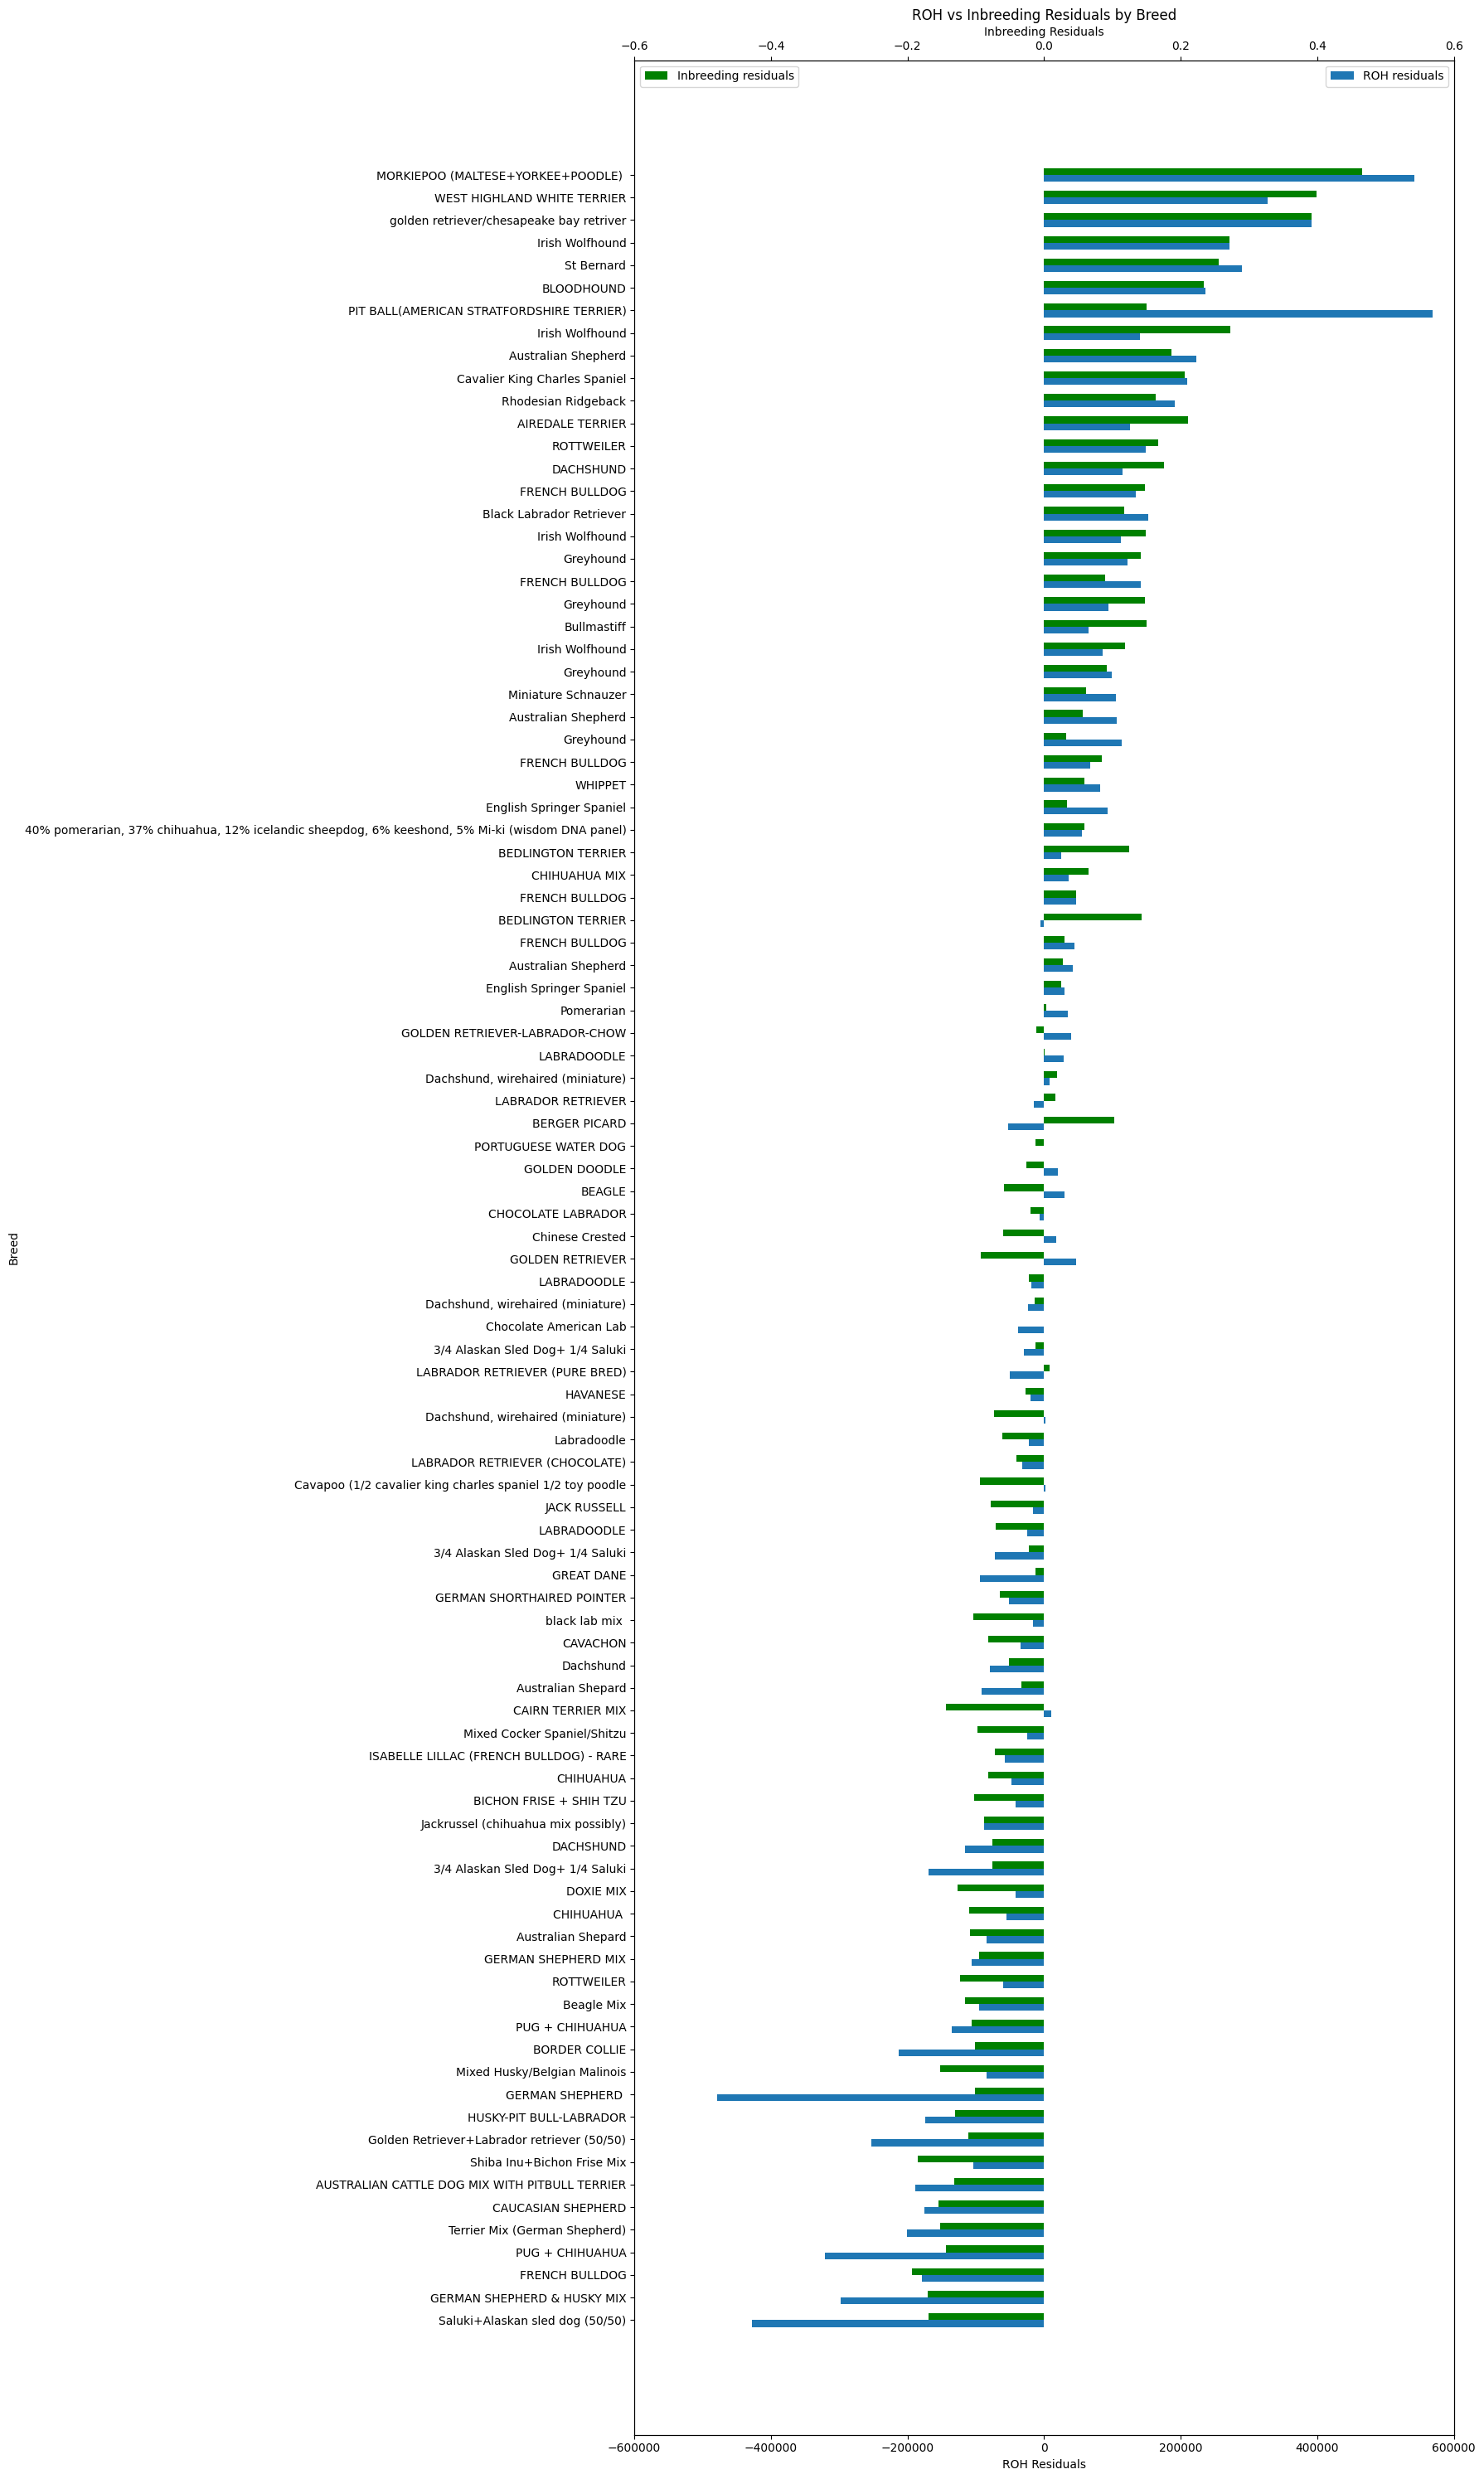

In [41]:
df.sort_values(by='average ranking', inplace=True)
fig, ax = plt.subplots(figsize=(18, 30))
ax2 = ax.twiny()

bar_width = 0.3
index = range(len(df['breed']))

roh_bars = ax.barh(index, df['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.barh([i + bar_width for i in index], df['Inbreeding residuals'], bar_width, label='Inbreeding residuals', color='green')

ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(df['breed'])

ax.set_ylabel('Breed')
ax.set_xlabel('ROH Residuals')
ax2.set_xlabel('Inbreeding Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_xlim(-600000, 600000)
ax2.set_xlim(-0.6, 0.6)

ax.legend(loc='upper right')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/3. Horizontal ROH v Inbreeding residuals by average ranking.png')
plt.show()


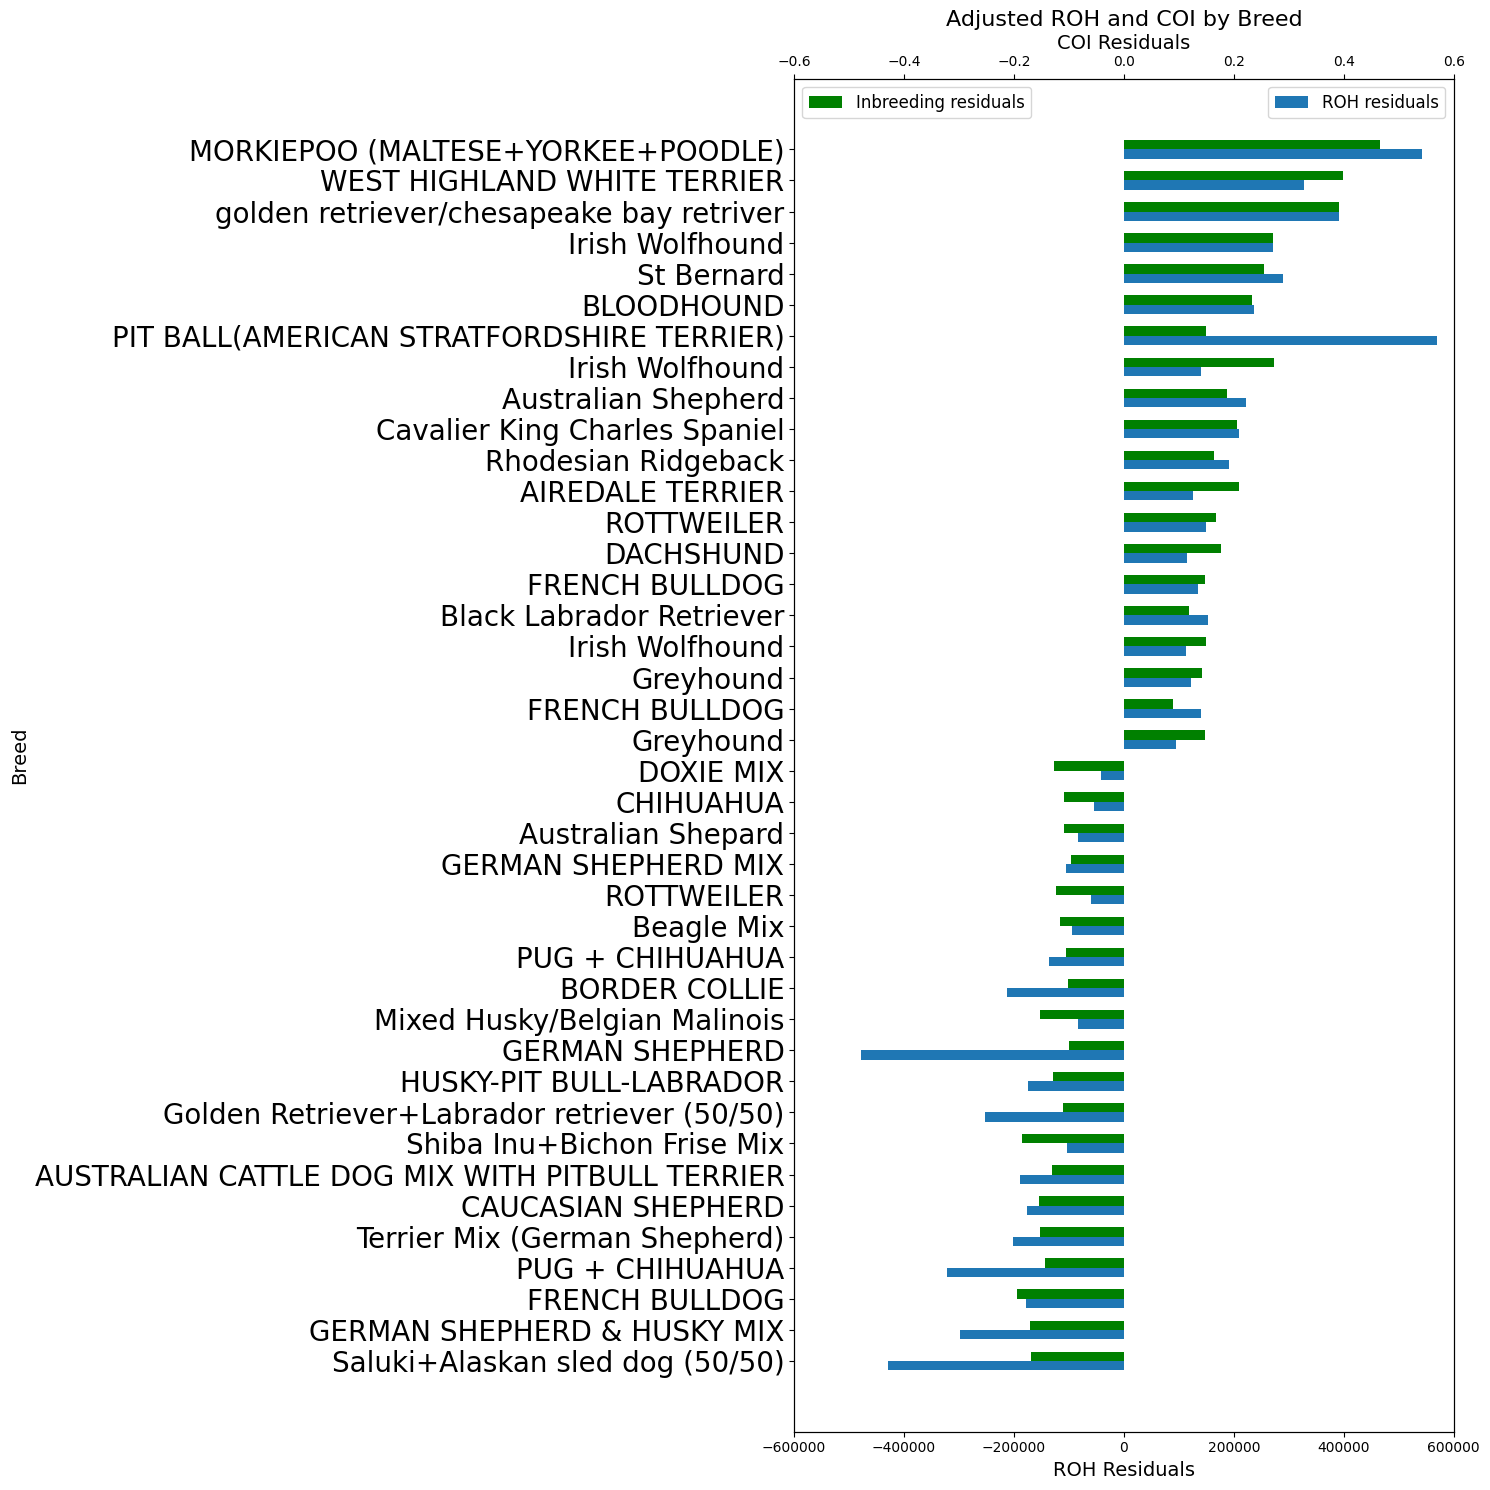

In [64]:
df.sort_values(by='average ranking', inplace=True)
concatdf = pd.concat([df.head(20), df.tail(20)])

fig, ax = plt.subplots(figsize=(15, 15))
ax2 = ax.twiny()

bar_width = 0.3
index = range(len(concatdf['breed']))

roh_bars = ax.barh(index, concatdf['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.barh([i + bar_width for i in index],
                            concatdf['Inbreeding residuals'], bar_width,
                            label='Inbreeding residuals', color='green')

# Tick labels for breeds
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(concatdf['breed'], fontsize=20)  # smaller breed names

# Axis labels with font sizes
ax.set_ylabel('Breed', fontsize=14)
ax.set_xlabel('ROH Residuals', fontsize=14)
ax2.set_xlabel('COI Residuals', fontsize=14)

# Axis limits
ax.set_xlim(-600000, 600000)
ax2.set_xlim(-0.6, 0.6)

# Legends
ax.legend(loc='upper right', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

# Title
ax.set_title('Adjusted ROH and COI by Breed', fontsize=16)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/3. horizontal Short ROH v Inbreeding residuals by average ranking.png')
plt.show()


In [43]:
df[['breed','Inbreeding ranking','ROH ranking','average ranking']]

,breed,Inbreeding ranking,ROH ranking,average ranking
115,Saluki+Alaskan sled dog (50/50),4.0,2.0,3.0
6,GERMAN SHEPHERD & HUSKY MIX,3.0,4.0,3.5
44,FRENCH BULLDOG,1.0,9.0,5.0
61,PUG + CHIHUAHUA,9.0,3.0,6.0
72,Terrier Mix (German Shepherd),7.0,7.0,7.0
...,...,...,...,...
106,St Bernard,91.0,92.0,91.5
96,Irish Wolfhound,92.0,91.0,91.5
92,golden retriever/chesapeake bay retriver,94.0,94.0,94.0
17,WEST HIGHLAND WHITE TERRIER,95.0,93.0,94.0


In [44]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Regression/breed-inbreeding.csv')
df.index.name=None

In [45]:
df

,Unnamed: 0,meandepth,KB,F,ROH residuals,Inbreeding residuals,breed,purebred,Inbreeding ranking,ROH ranking,average ranking
0,115,0.387909,414341,-0.750100,-428407.1999,-0.169021,Saluki+Alaskan sled dog (50/50),n,4,2,3.0
1,6,0.261109,1126740,-0.435200,-298498.1631,-0.170834,GERMAN SHEPHERD & HUSKY MIX,n,3,4,3.5
2,44,0.193176,1648490,-0.194400,-178506.1669,-0.193993,FRENCH BULLDOG,y,1,9,5.0
3,61,0.389640,516081,-0.729200,-321119.4974,-0.143912,PUG + CHIHUAHUA,n,9,3,6.0
4,72,0.254647,1258230,-0.396700,-201191.3366,-0.152140,Terrier Mix (German Shepherd),n,7,7,7.0
...,...,...,...,...,...,...,...,...,...,...,...
91,106,0.262116,1708640,-0.011340,289352.0951,0.255571,St Bernard,y,91,92,91.5
92,96,0.230171,1878060,0.113300,271945.1937,0.271857,Irish Wolfhound,y,92,91,91.5
93,92,0.313049,1563160,0.006494,391736.7144,0.391796,golden retriever/chesapeake bay retriver,n,94,94,94.0
94,17,0.227788,1947790,0.250600,327407.3293,0.398992,WEST HIGHLAND WHITE TERRIER,y,95,93,94.0


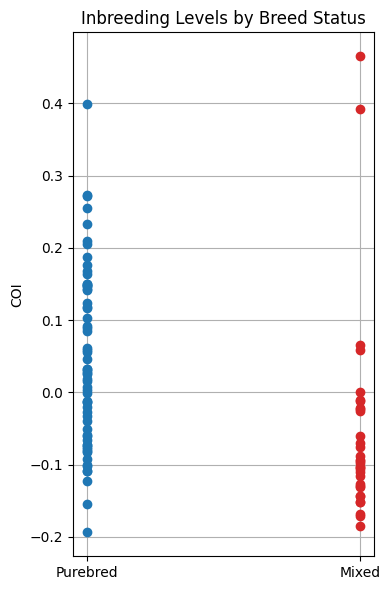

In [82]:

purebred_vals = df[df['purebred'] == 'y']['Inbreeding residuals'].values
not_purebred_vals = df[df['purebred'] == 'n']['Inbreeding residuals'].values

# Set up the figure
plt.figure(figsize=(4, 6))

# Plot purebred
plt.plot(['Purebred'] * len(purebred_vals), purebred_vals, 'o')

# Plot non-purebred
plt.plot(['Mixed'] * len(not_purebred_vals), not_purebred_vals, 'o', color='#d62728')

# Final touches
plt.ylabel("COI")
plt.title("Inbreeding Levels by Breed Status")
plt.grid(True)
plt.tight_layout()
plt.show()

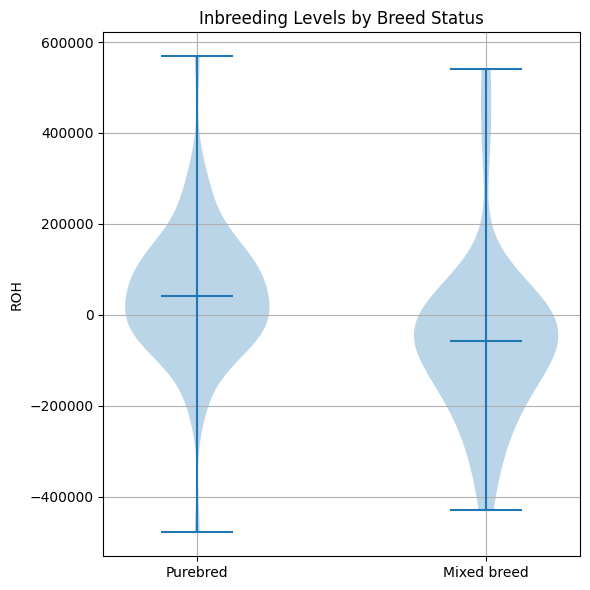

In [85]:
purebred_f = df[df['purebred'] == 'y']['ROH residuals'].values
nonpurebred_f = df[df['purebred'] == 'n']['ROH residuals'].values

# Prepare data for violinplot (list of arrays)
data_to_plot = [purebred_f, nonpurebred_f]

# Plot
plt.figure(figsize=(6, 6))
plt.violinplot(data_to_plot, positions=[0, 1], showmeans=True)

# Customize x-axis
plt.xticks([0, 1], ['Purebred', 'Mixed breed'])
plt.ylabel("ROH")
plt.title("Inbreeding Levels by Breed Status")
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:

from scipy import stats

# Optional: check unique values in 'purebred'
print("Unique values in 'purebred':", df['purebred'].unique())

# Map 'y' to "Purebred", 'n' to "Mixed" for clearer labels
df['Status'] = df['purebred'].map({'y': 'Purebred', 'n': 'Mixed'})

# Function to summarize stats for a numeric column
def summarize_stats(group, col):
    return pd.Series({
        'mean': group[col].mean(),
        'median': group[col].median(),
        'min': group[col].min(),
        'max': group[col].max(),
        'std': group[col].std(),
        'n': group[col].count()
    })

# Summarize RoH and COI by Status
roh_stats = df.groupby("Status").apply(summarize_stats, "ROH residuals")
coi_stats = df.groupby("Status").apply(summarize_stats, "Inbreeding residuals")

print("\n=== RoH stats by group ===")
print(roh_stats)

print("\n=== COI stats by group ===")
print(coi_stats)

# Calculate effect sizes: percent difference in means (Purebred relative to Mixed)
roh_percent_diff = 100 * (roh_stats.loc["Purebred", "mean"] - roh_stats.loc["Mixed", "mean"]) / roh_stats.loc["Mixed", "mean"]
coi_percent_diff = 100 * (coi_stats.loc["Purebred", "mean"] - coi_stats.loc["Mixed", "mean"]) / coi_stats.loc["Mixed", "mean"]

print(f"\nRoH mean difference: {roh_percent_diff:.2f}% higher in purebreds")
print(f"COI mean difference: {coi_percent_diff:.2f}% higher in purebreds")

# Statistical significance tests for RoH and COI between groups
for col in ["ROH residuals", "Inbreeding residuals"]:
    group_pure = df.loc[df["Status"] == "Purebred", col]
    group_mixed = df.loc[df["Status"] == "Mixed", col]
    # Test normality
    stat_pb, p_pb = stats.shapiro(group_pure)
    stat_mx, p_mx = stats.shapiro(group_mixed)
    normal = (p_pb > 0.05) and (p_mx > 0.05)
    print(f"\nTesting {col}:")
    if normal:
        t_stat, p_val = stats.ttest_ind(group_pure, group_mixed, equal_var=False)
        print(f"  t-test: t={t_stat:.3f}, p={p_val:.4f}")
    else:
        u_stat, p_val = stats.mannwhitneyu(group_pure, group_mixed, alternative='two-sided')
        print(f"  Mann-Whitney U: U={u_stat:.3f}, p={p_val:.4f}")


Unique values in 'purebred': ['n' 'y']

=== RoH stats by group ===
                  mean       median          min          max            std  \
Status                                                                         
Mixed    -56661.842747 -42048.77440 -428407.1999  541563.2302  179804.354305   
Purebred  41706.501923  32569.70697 -478542.6057  568887.4730  145154.251409   

             n  
Status          
Mixed     32.0  
Purebred  64.0  

=== COI stats by group ===
              mean   median       min       max       std     n
Status                                                         
Mixed    -0.054299 -0.09641 -0.184713  0.465559  0.141767  32.0
Purebred  0.044863  0.02869 -0.193993  0.398992  0.121879  64.0

RoH mean difference: -173.61% higher in purebreds
COI mean difference: -182.62% higher in purebreds

Testing ROH residuals:
  Mann-Whitney U: U=1496.000, p=0.0002

Testing Inbreeding residuals:
  Mann-Whitney U: U=1598.000, p=0.0000


/tmp/ipython-input-1246699628.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  roh_stats = df.groupby("Status").apply(summarize_stats, "ROH residuals")
/tmp/ipython-input-1246699628.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  coi_stats = df.groupby("Status").apply(summarize_stats, "Inbreeding residuals")
